# Projet d'analyse numérique

In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import random as rand
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

## A. Introduction

L'objectif principal de ce projet est la recherche numérique d'extrema de fonctions à plusieurs variables à valeurs réelles. 
\
Ainsi seront étudiées différentes méthodes permettant de répondre à cette problématique et aussi sera effectuée une application concrète sur une 
problématique réelle. 
\
Enfin seront apportés quelques compléments que nous avons trouvés intéressant concernant cette problématique.

## B. Optimisation d’une fonction d’une variable réelle

Les fonctions que nous considérerons dans cette partie sont des fonctions continues définies sur $[a,b]$.

**Question 1:** 

Méthode par balayage à pas constant :

In [2]:
def BalConstant (f,a,b,N):
    dx=(b-a)/N
    min = f(a)
    for i in range (1,N+1):
        if f(a+i*dx)<min:
            min = f(a+i*dx)
    return min

Méthode par balayage aléatoire :

In [3]:
def BalAlea (f,a,b,N):
    X=[rand.uniform(a,b) for i in range (N+1)]
    min = f(X[0])
    for x in X:
        if f(x)<min:
            min = f(x)
    return min

**Question 2:**

In [4]:
#Fonction 1
def pol(x):
    return x**3 - 3*x**2+2*x+5
    
# Autre polynome pour test : Fonction 2 
def pol2(x): 
    return x**4-2*x**3+x**2-5*x+2
    
#Ces fonctions rentrent bien dans les hypothèses.

In [5]:
a=0
b=3
N=100
print("1) Méthode par balayage à pas constant:",BalConstant(pol,a,b,N))
print("1) Méthode par balayage aléatoire :",BalAlea(pol,a,b,N))
print("2) Méthode par balayage à pas constant:",BalConstant(pol2,a,b,N))
print("2) Méthode par balayage aléatoire :",BalAlea(pol2,a,b,N))

1) Méthode par balayage à pas constant: 4.615379000000001
1) Méthode par balayage aléatoire : 4.615576489376846
2) Méthode par balayage à pas constant: -5.099743750000002
2) Méthode par balayage aléatoire : -5.099844431772443


Ces valeurs sont cohérentes avec les résultats réels.

**Question 3:**

Soit $A_N$ l'approximation du minimum de la fonction et $a_r$ et la valeur réelle du minimum.

Déterminons $e_n = \lvert A_N-a_r\rvert$ pour la fonction $f(x)=x^3-3x^2+2x+5$.

In [6]:
def erreur(methBal,minReel,Nmax,a,b):
    X=[x for x in range (1,Nmax+1)]
    Y=[]
    Z=[]
    for i in range (1,Nmax+1):
        Z.append(np.abs(methBal(pol,a,b,i)-minReel))
        Y.append(log(np.abs(methBal(pol,a,b,i)-minReel)))
    plt.figure(figsize=plt.figaspect(0.4))
    plt.subplot(211)
    plt.title(f"Méthode {methBal.__name__}")
    plt.plot(X,Y,color='m',label=r"$\log e_n$")
    plt.legend()
    plt.subplot(212)
    plt.plot(X,Z,color="g",label=r"$e_n$")
    plt.legend()

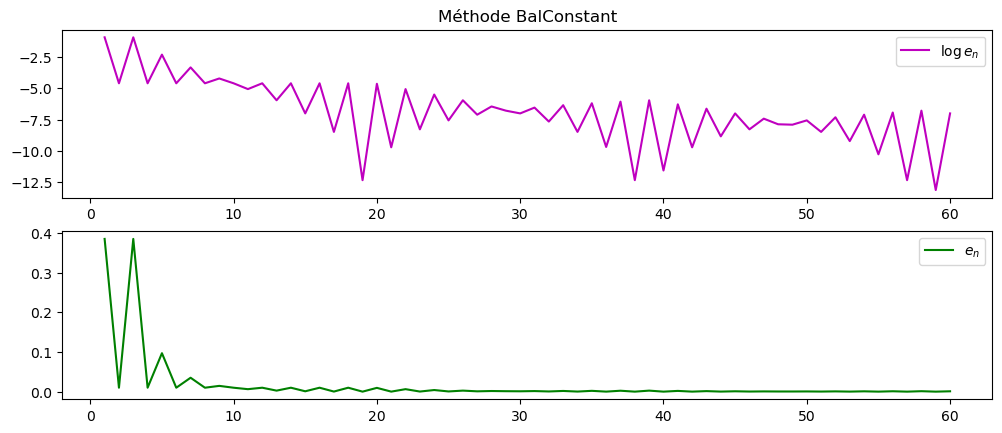

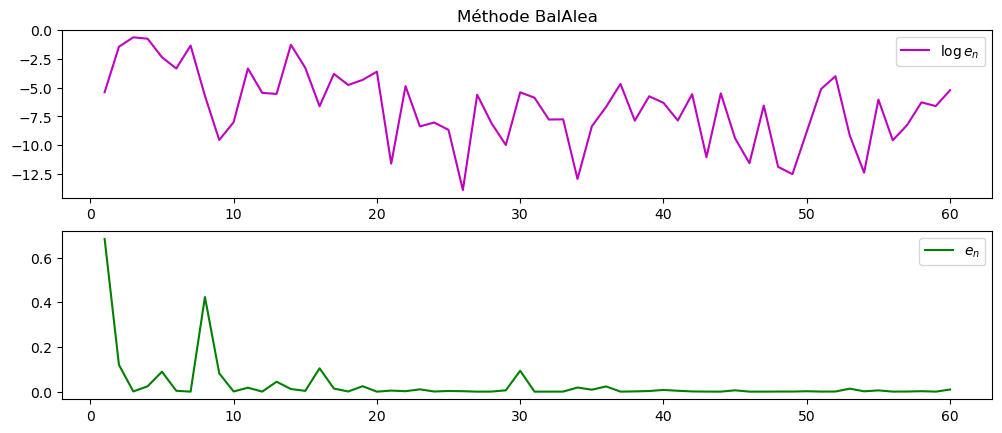

In [7]:
minReel= 5 - 2/(3*sqrt(3))
erreur(BalConstant,minReel,60,a,b)
erreur(BalAlea,minReel,60,a,b)

On constate que la méthode de balayage à pas constant semble plus efficace et plus **fiable**. 
\
En effet, l'erreur semble décroitre et tendre vers 0 de manière *relativement* régulière pour cette méthode tandis que la méthode de balayage aléatoire elle semble plus imprévisible. 
\
Dans les faits, on observe aussi une décroissance et une tendance à tendre vers 0 mais avec des pics réguliers, pics qui ne sont pas présent dans l'autre méthode. \
D'où la conclusion.

**Question 4:**

Modifions légèremente le code de la méthode de balayage à pas constant précédent pour cette fois çi obtenir le maximum de la fonction.

In [8]:
def BalConstantMax(f,a,b,N):
    dx=(b-a)/N
    max = f(a)
    for i in range (1,N+1):
        if f(a+i*dx)>max:
            max= f(a+i*dx)
    return max

In [9]:
print("1)",BalConstantMax(pol,a,b,N))
print("2)",BalConstantMax(pol2,a,b,N))

1) 11.0
2) 23.0


Ces valeurs sont cohérentes avec les résultats réels.


**Question 5**

Soit le point d'abscisse $x_n$. Considérons d'abord le cas où ce dernier est un minimum, alors $x_{n+1}=x_{n}$ car dans ce cas on aurait $f'(x_n)=0$.

Maintenant si ce n'est pas le cas, alors en choisissant $u$ assez petit et **négatif** (car sinon on reculerait quand la fonction est décroissante et n'atteindrons donc pas le minimum, mais un potentielle maximum), on avance de manière précise et proportionnel à la pente de la courbe vers le minimum, cette pente étant donc non nulle.\
Ainsi, en général $x_{n+1}$ est plus proche du minimum que $x_n$ car nous avons avancé proportionellement à la pente et c'est celle-çi qui est indicatrice et qui caractérise un minimimum par le fait qu'elle soit nulle en ce dernier. \
C'est le cas en général du fait que si le pas $u$ est trop élevée ou que si nous somme extrêment proche du minimum mais pas exactement à ce dernier, il est possible de le dépasser (car $f'(x_n)\neq 0$) et donc de s'en éloigner potentiellement le temps d'une itération et donc d'avoir un contre-exemple.

**Question à poser:** Possible que si 1 minimum local seulement dans l'intervalle. ??

**Question 6**

In [10]:
#Définition des dérivées des fonctions 1 et 2 précédentes
def df(x):
    return 3*x**2 - 6*x + 2
    
def df2(x):
    return 4*x**3 - 6*x**2 + 2*x - 5        

In [11]:
#Méthode avec le premier terme choisie manuellement
def Grad1D(f,df,x0,u,N):
    xn=x0
    for i in range(N-1):
        xn1=xn+u*df(xn)
        xn=xn1
    return f(xn)
#Méthode avec premier terme choisie aléatoirement dans l'intervalle
def Grad1DVariante(f,df,a,b,u,N):
    xn=rand.uniform(a,b)
    for i in range(N-1):
        xn1=xn+u*df(xn)
        xn=xn1
    return f(xn)

In [12]:
print("1)x_0 imposée:",Grad1D(pol,df,1,-0.001,10000))
print("1)x_0 aléatoire:",Grad1DVariante(pol,df,0,3,-0.001,10000))
print("2)x_0 imposée:",Grad1D(pol2,df2,1,-0.001,10000))
print("2)x_0 aléatoire:",Grad1DVariante(pol2,df2,0,3,-0.001,10000))

1)x_0 imposée: 4.61509982054025
1)x_0 aléatoire: 4.61509982054025
2)x_0 imposée: -5.099892037763601
2)x_0 aléatoire: -5.099892037763601


Ces résultats sont cohérent.

**Question 7**

***a.*** 

Soit: $$\varphi (t)=f(x_n + tf'(x_n))$$
\
On a donc: $$\varphi '(t)= f'(x_n).f'(x_n + tf'(x_n))$$
Et: $$\varphi ''(t)= (f'(x_n))^2.f''(x_n + tf'(x_n))$$
D'où: $$\varphi'(0)=(f'(x_n))^2,~\varphi''(0)=(f'(x_n))^2.f''(x_n) $$

***b.***

On a donc: $$\varphi'(t)=(f'(x_n))^2+(f'(x_n))^2.f''(x_n))t+o_{0}(t)$$
Il ne reste maintenant plus qu'à chercher $t_{opt}~$ tel que $\varphi'(t_{opt})=0$ pour obtenir $u=t_{opt}$.

On ommettra dans la suite le $o_{0}(t)$ pour ne pas surcharger la notation mais nous gardons tout de même à l'esprit que l'égalité n'est pas parfaite. \
D'où: $$u=-\frac{1}{f''(x_n)}$$
On a donc au final: $$x_{n+1}=x_n-\frac{f'(x_n)}{f''(x_n)} $$
En posant $g(x)=f'(x)$, on retrouve la **méthode de Newton**: $$x_{n+1}=x_n-\frac{g(x_n)}{g'(x_n)}$$

## C. Optimisation d’une fonction de deux variables réelles

Soit les fonctions de deux variables $g$ et $h$ définies par: $$g_{a,b}(x,y)=\frac{x^2}{a}+\frac{y^2}{b},~ h(x,y)=\cos x \sin y $$ 

**Question 8**

In [13]:
#Définition des fonctions g et h:
def g(X,Y,a=2,b=2/7):
    return ((X**2) / a) + ((Y**2) / b)

def h(X,Y):
    return np.cos(X)*np.sin(Y)

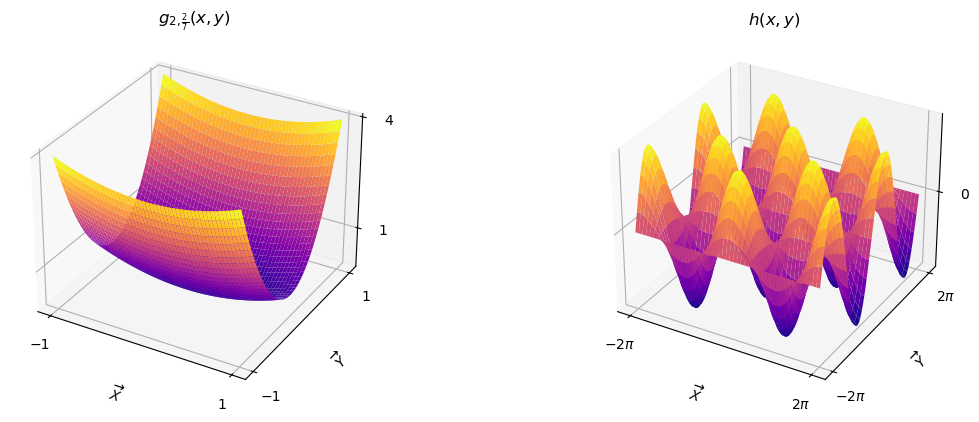

In [14]:
#Definition de la figure en entière
fig = plt.figure(figsize=plt.figaspect(0.35))

#Définition de g
ax = fig.add_subplot(1,2,1,projection='3d')
plt.title(r"$g_{2,\frac{2}{7}}(x,y)$")

x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X,Y= np.meshgrid(x,y)
Z = g(X,Y)

ax.set_xticks([-1,1])
ax.set_yticks([-1,1])
ax.set_zticks([1,4])

ax.set_xlabel(r'$\overrightarrow{X}$')
ax.set_ylabel(r'$\overrightarrow{Y}$')

ax.plot_surface(X, Y, Z,cmap="plasma")

#Définition de h
ax = fig.add_subplot(1,2,2,projection='3d')
plt.title(r"$h(x,y)$")

x2 = np.linspace(-2*np.pi, 2*np.pi, 2000)
y2 = np.linspace(-2*np.pi, 2*np.pi, 2000)
X2,Y2= np.meshgrid(x2,y2)
Z2 = h(X2,Y2)

ax.set_xticks([-2*np.pi,2*np.pi],[r"$-2\pi$",r"$2\pi$"])
ax.set_yticks([-2*np.pi,2*np.pi],[r"$-2\pi$",r"$2\pi$"])
ax.set_zticks([0])

ax.set_xlabel(r'$\overrightarrow{X}$')
ax.set_ylabel(r'$\overrightarrow{Y}$')


ax.plot_surface(X2, Y2, Z2,cmap="plasma")

#Afficher la figure
plt.show()

**Question 9**

1. Fonction $g_{2,\frac{2}{7}}(x,y)$:

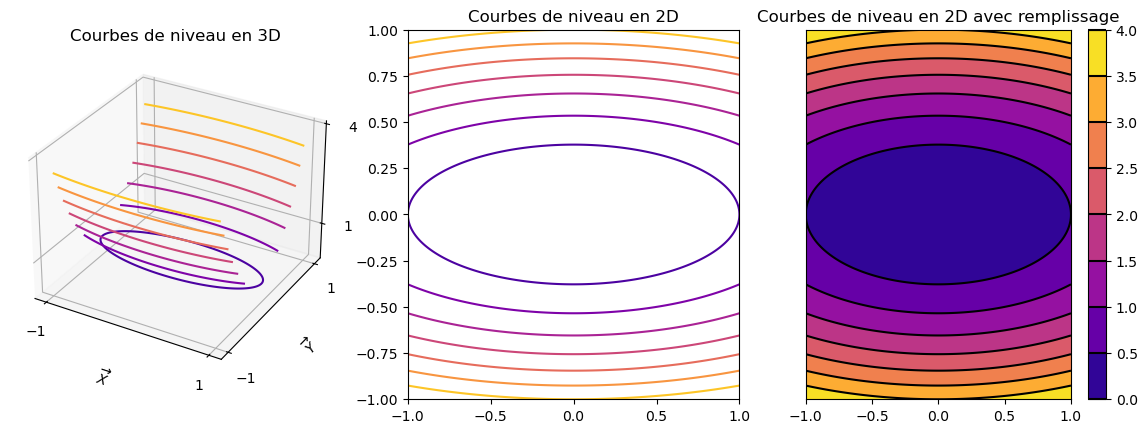

In [15]:
#Figure global
fig = plt.figure(figsize=plt.figaspect(0.33))
# Ligne de niveau en 3D
ax = fig.add_subplot(1,3,1,projection='3d')
plt.title("Courbes de niveau en 3D")

ax.set_xticks([-1,1])
ax.set_yticks([-1,1])
ax.set_zticks([1,4])

ax.set_xlabel(r'$\overrightarrow{X}$')
ax.set_ylabel(r'$\overrightarrow{Y}$')

ax.contour(X, Y, Z, levels= 7,cmap="plasma")  
#Ligne de niveau en 2D

ax = fig.add_subplot(1,3,2)
plt.title("Courbes de niveau en 2D")

ax.contour(X, Y, Z, cmap="plasma") 

#Ligne de niveau en 2D avec remplissage
ax = fig.add_subplot(1,3,3)
plt.title("Courbes de niveau en 2D avec remplissage")

ax.set_yticks([])

CS=ax.contour(X, Y, Z,colors="black") 
CS2 = ax.contourf(X, Y, Z,cmap="plasma") 

cbar = fig.colorbar(CS2)
cbar.add_lines(CS)


plt.show()

2. Fonction $h(x,y)$:

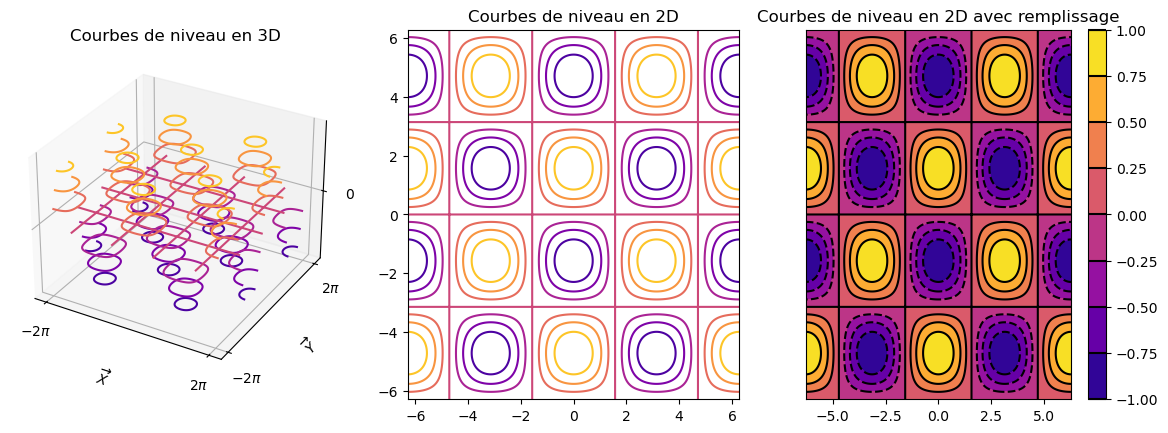

In [19]:
#Figure global
fig = plt.figure(figsize=plt.figaspect(0.33))
# Ligne de niveau en 3D
ax = fig.add_subplot(1,3,1,projection='3d')
plt.title("Courbes de niveau en 3D")

ax.set_xticks([-2*np.pi,2*np.pi],[r"$-2\pi$",r"$2\pi$"])
ax.set_yticks([-2*np.pi,2*np.pi],[r"$-2\pi$",r"$2\pi$"])
ax.set_zticks([0])

ax.set_xlabel(r'$\overrightarrow{X}$')
ax.set_ylabel(r'$\overrightarrow{Y}$')

ax.contour(X2, Y2, Z2,cmap="plasma")  
#Ligne de niveau en 2D

ax = fig.add_subplot(1,3,2)
plt.title("Courbes de niveau en 2D")

ax.contour(X2, Y2, Z2,cmap="plasma") 

#Ligne de niveau en 2D avec remplissage
ax = fig.add_subplot(1,3,3)
plt.title("Courbes de niveau en 2D avec remplissage")

ax.set_yticks([])

CS=ax.contour(X2, Y2, Z2,colors="black") 
CS2 = ax.contourf(X2, Y2, Z2,cmap="plasma") 

cbar = fig.colorbar(CS2)
cbar.add_lines(CS)

plt.show()

**Question 10**

Calculons les gradients des fonctions $g_{a,b}$ et $h$. \
On a donc : $$ \overrightarrow{grad}~(g_{a,b}(x,y))= \left( \frac{2}{a}x,\frac{2}{b}y\right)$$
Et $$ \overrightarrow{grad}~(h(x,y))=(-\sin x \sin y,\cos x \cos y)$$

**Question 11**








